<a href="https://colab.research.google.com/github/AdrianMPCodes/AMP-and-RZ---Is-Good-Music-Biased-Predicting-Grammy-Winning-Albums/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# load in df
link = "https://github.com/AdrianMPCodes/AMP-and-RZ---Is-Good-Music-Biased-Predicting-Grammy-Winning-Albums/blob/main/Data%20Collection%20and%20Cleaning/df_combinedVariables.csv?raw=true"
df_all = pd.read_csv(link)

In [7]:
df_heatmap_avg = df_all.drop(columns=["num_of_tracks", "won", "artists","sex", "album_name", "type","duration_ms", "key", "loudness", "tempo"])
matrix_means = []
for col in df_heatmap_avg.columns:
  vals = df_heatmap_avg[col]
  matrix_means.append(vals)

In [31]:
album_names = df_all["album_name"]
features = df_heatmap_avg.columns

fig_data = go.Heatmap(
   x = album_names,
   y = features,
   z = matrix_means,
   type = 'heatmap',
   colorscale = 'Viridis'
)
fig_heat_avgs = go.Figure(data = [fig_data])

# Reduce the font size of the y-axis labels to fit more labels on the plot
fig_heat_avgs.update_layout(
    title='All Albums and their Features',
    yaxis=dict(
        tickfont=dict(size=7) # adjust the font size of the y-axis labels
    )
)

fig_heat_avgs

In [36]:
# heatmap (winning)
# getting data rdy (only want winning albs)
df_won = df_all[df_all["won"]==True]
df_heatmap_avg_won = df_won.drop(columns=["num_of_tracks", "won", "artists","sex", "album_name", "type","duration_ms", "key", "loudness", "tempo"])
album_names_won = df_won["album_name"]
matrix_means_won = []
for col in df_heatmap_avg_won.columns:
  vals = df_heatmap_avg_won[col]
  matrix_means_won.append(vals)

# creating heatmap (winning)
album_names_won = df_won["album_name"]
features = df_heatmap_avg_won.columns

fig_data_won = go.Heatmap(
  x = album_names_won,
  y = features,
  z = matrix_means_won,
  type = 'heatmap',
  colorscale = 'Viridis'
)

fig_heat_avgs_won = go.Figure(data = [fig_data_won])

fig_heat_avgs_won.update_layout(
  title='Winning Albums and their Features'
)

fig_heat_avgs_won

## Bar graphs

<Axes: xlabel='type,sex'>

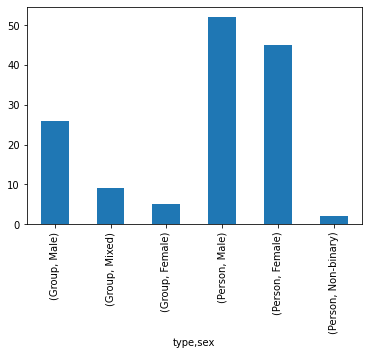

In [ ]:
# bar graphs: for demographics (gender)
gender_dist = df_all.groupby("type")["sex"].value_counts()
gender_dist.plot.bar(stacked=True)

<Axes: xlabel='type,sex'>

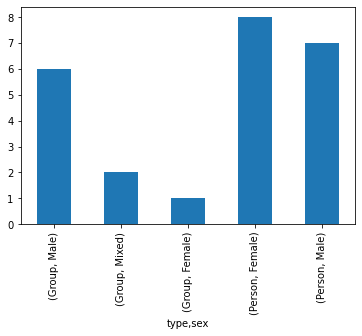

In [ ]:
# bar graphs  : for demographics (gender, race)
# gender breakdown
df_won = df_all[df_all["won"]==True]
gender_dist = df_won.groupby("type")["sex"].value_counts()
gender_dist.plot.bar(stacked=True)

#### Getting bar plots for each feature: winning albums

<Axes: title={'center': 'speechiness'}>

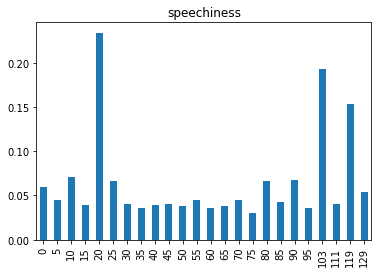

In [ ]:
df_won = df_all[df_all["won"]==True]
df_won["speechiness"].plot.bar(stacked=True, title = "speechiness")

<Axes: title={'center': 'acousticness'}>

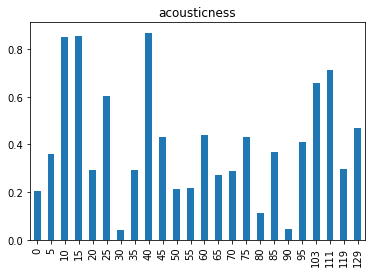

In [ ]:
df_won["acousticness"].plot.bar(stacked=True, title = "acousticness")

<Axes: title={'center': 'instrumentalness'}>

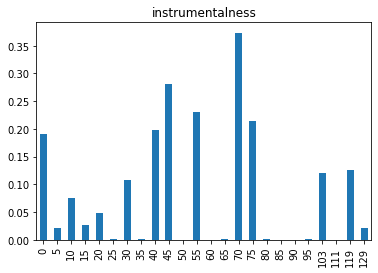

In [ ]:
df_won["instrumentalness"].plot.bar(stacked=True, title = "instrumentalness")

In [29]:
# Show how related each feature is to each other
import plotly.graph_objs as go
import pandas as pd

# Get the columns of interest
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df_features = df_all[features]

# Calculate the correlation matrix
corr_matrix = df_features.corr()

# Create the heatmap figure
fig_heatmap = go.Figure(
    data=go.Heatmap(
        x=corr_matrix.columns,
        y=corr_matrix.columns[::-1],
        z=corr_matrix.values[::-1],
        colorscale='Viridis'
    )
)

# Add axis labels and adjust the layout
fig_heatmap.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features', autorange='reversed'),
)

# Show the figure
fig_heatmap.show()